# Proyecto 3
## Ataques a Modelos de Deep Learning
Ataque y defensa de modelos de aprendizaje de máquina y aprendizaje profundo.
> #### Gerardo Méndez 18239
> #### María José Castro 181202

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras.constraints import maxnorm
from keras.preprocessing.image import ImageDataGenerator

In [7]:
DATA_DIRECTORY = '/content/drive/MyDrive/SDS-Lab-07/malimg_paper_dataset_imgs'

### OBTENCION DE IMAGENES

In [18]:
path_images = ImageDataGenerator().flow_from_directory(directory=DATA_DIRECTORY, target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [19]:
images, marks = next(path_images)

In [20]:
indices_path = path_images.class_indices

In [21]:
type_images = indices_path.keys()

In [22]:
shape = marks.shape

print("--> NO. DE IMÁGENES: ", shape[0])
print("--> NO. DE CLASES: ", shape[1])

--> NO. DE IMÁGENES:  9339
--> NO. DE CLASES:  25


In [23]:
add = sum(marks)
marks_qt = marks.shape[0]

In [24]:
quantity = ((add) / marks_qt)

In [25]:
quantity = quantity * 100
quantity

array([ 1.3063496 ,  1.2421031 , 31.577257  , 17.036085  ,  2.1201413 ,
        1.1350251 ,  1.5633365 ,  2.141557  ,  1.895278  ,  1.7346611 ,
        4.079666  ,  4.615055  ,  2.2807581 ,  1.9702322 ,  1.3170575 ,
        1.7025378 ,  1.4562588 ,  1.5205053 ,  1.6918299 ,  0.85662276,
        1.3705964 ,  1.4134276 ,  4.3687763 ,  1.038655  ,  8.566228  ],
      dtype=float32)

### DIVISION DE DATOS

In [26]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(images/255.,marks, test_size=0.3)

In [28]:
#Datasets de train de X
print(X_train.shape)
print(X_train.size)

(6537, 128, 128, 3)
321306624


In [29]:
#Dataset de test de X
print(X_test.shape)
print(X_test.size)

(2802, 128, 128, 3)
137723904


In [30]:
#Dataset de train de Y
print(y_train.shape)
print(y_train.size)

(6537, 25)
163425


In [31]:
#Dataset de test de Y
print(y_test.shape)
print(y_test.size)

(2802, 25)
70050


### MODELO

In [20]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), input_shape=(128, 128, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
#model.add(keras.layers.Dropout(0.2))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(25, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                                 
 dense (Dense)               (None, 128)               58982528  
                                                        

In [22]:
model.layers

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
op = model.evaluate(X_test, y_test)
print("Accuracy ", op[1])

88/88 [==============================] - 52s 579ms/step - loss: 3.2245 - accuracy: 0.0375
Accuracy  0.03747323155403137


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4)

Epoch 1/4
205/205 [==============================] - 554s 3s/step - loss: 0.9214 - accuracy: 0.8319 - val_loss: 0.3162 - val_accuracy: 0.9211
Epoch 2/4
205/205 [==============================] - 568s 3s/step - loss: 0.0883 - accuracy: 0.9732 - val_loss: 0.1290 - val_accuracy: 0.9661
Epoch 3/4
205/205 [==============================] - 569s 3s/step - loss: 0.0279 - accuracy: 0.9917 - val_loss: 0.1683 - val_accuracy: 0.9643
Epoch 4/4
205/205 [==============================] - 568s 3s/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.1086 - val_accuracy: 0.9779


In [30]:
type_images

dict_keys(['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A'])

In [31]:
model.save('/content/drive/MyDrive/SDS-Lab-07/Finalmodel.h5')

In [32]:
#Para saber la accuracy total
getAccuracy = model.evaluate(X_test, y_test)

88/88 [==============================] - 54s 605ms/step - loss: 0.1086 - accuracy: 0.9779


In [33]:
print('Accuracy: ',getAccuracy[1])

Accuracy:  0.9778729677200317


### Ataque de Extraccion

In [32]:
#Primero cargamos el modelo para no ejecutarlo cada vez
Modelmalware = keras.models.load_model('/content/drive/MyDrive/SDS-Lab-07/Finalmodel.h5')

In [33]:
#Variables con las que se desarrollo el modelo inicial y necesarias
num_epochs = 4
len_steal = 5000

In [34]:
from art.estimators.classification import KerasClassifier

In [35]:
tf.compat.v1.disable_eager_execution()

In [36]:
#Transformamos el modelo en clasificador de Keras
classifier_original = KerasClassifier(model=Modelmalware, clip_values=(0,1), use_logits=False)
#classifier_original = KerasClassifier(Modelmalware, clip_values=(0, 1), use_logits=False)

In [37]:
x_test0 = X_test
y_test0 = y_test
#Esta parte del codigo fue extraida del repositorio: 
#https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/model-stealing-demo.ipynb
#Fue uno de los insumos proporcionados para este proyecto 

# Stealing from the unprotected classifier.
from art.attacks import ExtractionAttack
from art.attacks.extraction import CopycatCNN, KnockoffNets

attack_catalogue = {"Probabilistic CopycatCNN": CopycatCNN(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN": CopycatCNN(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets": KnockoffNets(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets": KnockoffNets(classifier=classifier_original,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                   }

In [38]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Reshape

In [39]:
num_classes = 25

def malware_steal_model():
    # se crea un nuevo modelo para la data robada
    Malware_model = Sequential(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(128,128,3)))
   
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [40]:
im_shape = X_train[0].shape
def get_model(num_classes=10, c1=32, c2=128, d1=64):
    model = Sequential()
    model.add(Conv2D(c1, kernel_size=(3, 3), activation='relu', input_shape=im_shape))
    model.add(Conv2D(c2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(d1, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd",
                          metrics=['accuracy'])
    return model

In [41]:

results = []
for len_steal in [250, 500, 1000, 2000, 4000, 5000]:
    indices = np.random.permutation(len(x_test0))
    x_steal = x_test0[indices[:len_steal]]
    y_steal = y_test0[indices[:len_steal]]
    x_test = x_test0[indices[len_steal:]]
    y_test = y_test0[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = malware_steal_model()
        classifier_stolen = KerasClassifier(model_stolen, clip_values=(0, 1), use_logits=False)
        classifier_stolen = attack.extract(x_steal, y_steal, thieved_classifier=classifier_stolen)
        acc = classifier_stolen._model.evaluate(x_test, y_test)[1]
        print(name, ":", acc)
        results.append((name, len_steal, acc))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Train on 250 samples
Epoch 1/4
250/250 [==============================] - 4s 18ms/sample - loss: 3.3020 - accuracy: 0.1680
Epoch 2/4
250/250 [==============================] - 4s 17ms/sample - loss: 2.7415 - accuracy: 0.2440
Epoch 3/4
250/250 [==============================] - 4s 17ms/sample - loss: 2.5403 - accuracy: 0.2520
Epoch 4/4
250/250 [==============================] - 4s 18ms/sample - loss: 2.3477 - accuracy: 0.3120


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Probabilistic CopycatCNN : 0.4130094
Train on 250 samples
Epoch 1/4
250/250 [==============================] - 4s 18ms/sample - loss: 3.4354 - accuracy: 0.1280
Epoch 2/4
250/250 [==============================] - 4s 17ms/sample - loss: 2.8501 - accuracy: 0.2080
Epoch 3/4
250/250 [==============================] - 4s 17ms/sample - loss: 2.7468 - accuracy: 0.2000
Epoch 4/4
250/250 [==============================] - 4s 17ms/sample - loss: 2.5554 - accuracy: 0.2720
Argmax CopycatCNN : 0.31543887
Probabilistic KnockoffNets : 0.45141065
Argmax KnockoffNets : 0.1637931
Train on 500 samples
Epoch 1/4
500/500 [==============================] - 9s 18ms/sample - loss: 2.7346 - accuracy: 0.2660
Epoch 2/4
500/500 [==============================] - 9s 17ms/sample - loss: 2.1813 - accuracy: 0.3680
Epoch 3/4
500/500 [==============================] - 9s 17ms/sample - loss: 1.7764 - accuracy: 0.4580
Epoch 4/4
500/500 [==============================] - 9s 17ms/sample - loss: 1.4818 - accuracy: 0.5600
Pr

ValueError: ignored

Metricas

In [44]:
import matplotlib.pyplot as plt

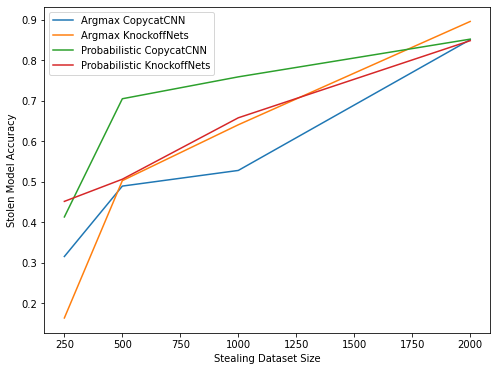

In [45]:
#Comparacion del modelo obtenido, versus el damano del dataset
#Esto tambien obtenido del repo mencionado previamente 

import pandas as pd
df = pd.DataFrame(results, columns=('Method Name', 'Stealing Dataset Size', 'Accuracy'))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")
for name, group in df.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)
plt.show()

Defense Layer


In [47]:
from art.defences.postprocessor import ReverseSigmoid

In [50]:
# Prepare the defense layer.
postprocessor = ReverseSigmoid(beta=1.0, gamma=0.2)
classifier_protected = KerasClassifier(Modelmalware, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

# Below is used by `FunctionallyEquivalentExtraction`.
model_flat = Sequential([InputLayer([128, 128, 3]), Reshape([128, 128, 3]), Modelmalware])
model_flat.compile('sgd', 'categorical_crossentropy', ['accuracy'])
classifier_flat_protected = KerasClassifier(model_flat, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

Comparacion entre ambos


In [51]:
num_epochs = 4
len_steal = 5000
attack_catalogue = {
                    "Probabilistic CopycatCNN (vs. Protected)": CopycatCNN(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax CopycatCNN (vs. Protected)": CopycatCNN(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
                    "Probabilistic KnockoffNets (vs. Protected)": KnockoffNets(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=True),
                    "Argmax KnockoffNets (vs. Protected)": KnockoffNets(classifier=classifier_protected,
                                              batch_size_fit=64,
                                              batch_size_query=64,
                                              nb_epochs=num_epochs,
                                              nb_stolen=len_steal,
                                              use_probability=False),
}

In [60]:
X_test0 = X_test
y_test0 = y_test

In [61]:

results_protected = []
for len_steal in [250, 500, 1000, 2000, 3000, 4000]:
    indices = np.random.permutation(len(X_test0))
    x_steal = X_test0[indices[:len_steal]]
    y_steal = y_test0[indices[:len_steal]]
    x_test = X_test0[indices[len_steal:]]
    y_test = y_test0[indices[len_steal:]]

    for name, attack in attack_catalogue.items():
        model_stolen = malware_steal_model()
        classifier_stolen = KerasClassifier(model_stolen, clip_values=(0, 1), use_logits=False)
        if name=="FunctionallyEquivalentExtraction":
            # Se modifica el shape de la data 
            classifier_stolen = attack.extract(np.reshape(x_steal, [len(x_steal), -1]), y_steal, thieved_classifier=classifier_stolen)
        else:
            classifier_stolen = attack.extract(x_steal, y_steal, thieved_classifier=classifier_stolen)
        
        acc = classifier_stolen._model.evaluate(x_test, y_test)[1]
        print(name, ":", acc)
        results_protected.append((name, len_steal, acc))

/usr/local/lib/python3.7/dist-packages/art/defences/postprocessor/reverse_sigmoid.py:75: RuntimeWarning: divide by zero encountered in log
  perturbation_r = self.beta * (sigmoid(-self.gamma * np.log((1.0 - preds_clipped) / preds_clipped)) - 0.5)


Train on 250 samples
Epoch 1/4
250/250 [==============================] - 5s 20ms/sample - loss: 3.2712 - accuracy: 0.0320
Epoch 2/4
250/250 [==============================] - 4s 18ms/sample - loss: 3.2195 - accuracy: 0.0440
Epoch 3/4
250/250 [==============================] - 4s 17ms/sample - loss: 3.2189 - accuracy: 0.0360
Epoch 4/4
250/250 [==============================] - 4s 18ms/sample - loss: 3.2188 - accuracy: 0.0200


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Probabilistic CopycatCNN (vs. Protected) : 0.00822884
Train on 250 samples
Epoch 1/4
250/250 [==============================] - 5s 20ms/sample - loss: 3.4522 - accuracy: 0.1920
Epoch 2/4
250/250 [==============================] - 4s 18ms/sample - loss: 2.8662 - accuracy: 0.2480
Epoch 3/4
250/250 [==============================] - 4s 17ms/sample - loss: 2.6973 - accuracy: 0.3160
Epoch 4/4
250/250 [==============================] - 4s 17ms/sample - loss: 2.5326 - accuracy: 0.3200
Argmax CopycatCNN (vs. Protected) : 0.31034482
Probabilistic KnockoffNets (vs. Protected) : 0.01606583
Argmax KnockoffNets (vs. Protected) : 0.39655173
Train on 500 samples
Epoch 1/4
500/500 [==============================] - 9s 18ms/sample - loss: 3.2726 - accuracy: 0.0800
Epoch 2/4
500/500 [==============================] - 9s 17ms/sample - loss: 3.2190 - accuracy: 0.0520
Epoch 3/4
500/500 [==============================] - 9s 17ms/sample - loss: 3.2188 - accuracy: 0.2020
Epoch 4/4
500/500 [===================

ValueError: ignored

Metricas de Comparacion

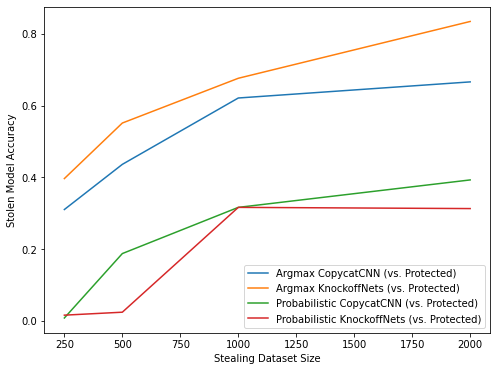

In [62]:
df_protected = pd.DataFrame(results_protected, columns=('Method Name', 'Stealing Dataset Size', 'Accuracy'))
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")
for name, group in df_protected.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)
plt.show()

Probabilistico vs. Protegido

In [63]:
df_combined = pd.concat([df, df_protected])
groupby = df_combined.groupby("Method Name")

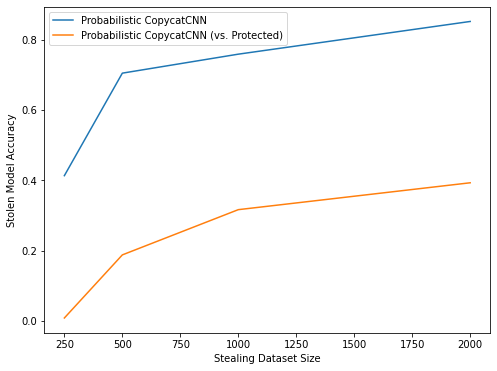

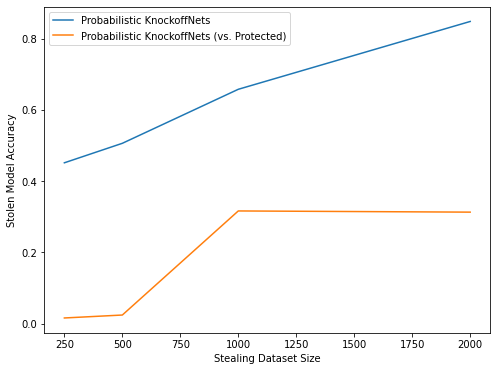

In [64]:
names = ["CopycatCNN", "KnockoffNets"]
for name in names:
    fig, ax = plt.subplots(figsize=(8,6))
    groupby.get_group("Probabilistic " + name).plot(1,2,ax=ax, label="Probabilistic " + name)
    groupby.get_group("Probabilistic " + name + " (vs. Protected)").plot(1,2,ax=ax, label="Probabilistic " + name + " (vs. Protected)")
    ax.set_xlabel("Stealing Dataset Size")
    ax.set_ylabel("Stolen Model Accuracy")
    fig.show()